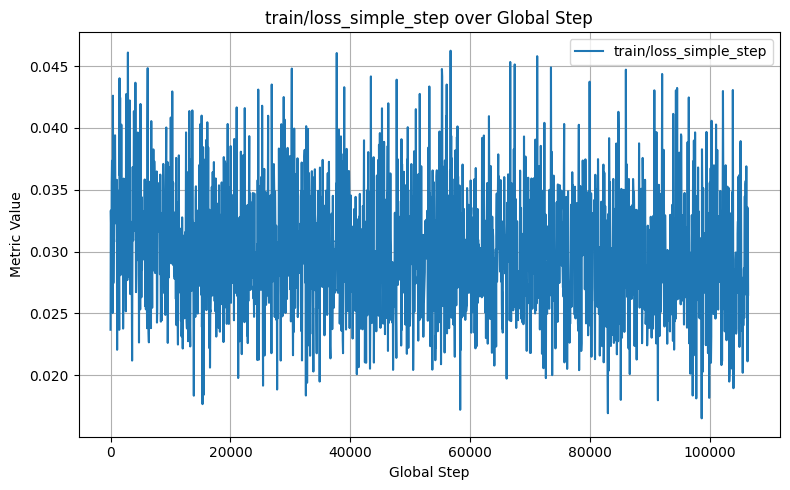

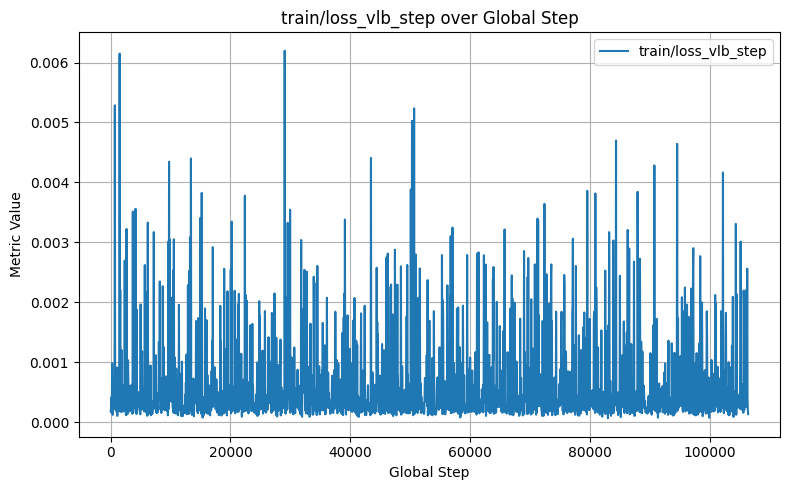

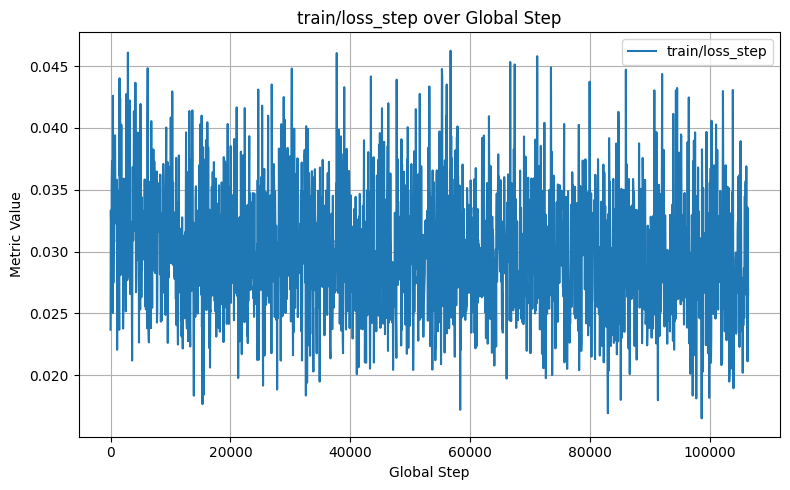

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your CSV file
csv_path = "/txining/zero123/zero123/logs/2025-06-25T09-15-07_sd-objaverse-finetune-c_concat-256/testtube/version_1/metrics.csv"

# Load the CSV
df_raw = pd.read_csv(csv_path)

# Drop rows with no global_step (i.e., metadata rows)
df = df_raw[df_raw["global_step"].notnull()].copy()

# Convert global_step to integer (optional, but makes the x-axis cleaner)
df["global_step"] = df["global_step"].astype(int)

# Plot each train step metric
train_step_metrics = [
    "train/loss_simple_step",
    "train/loss_vlb_step",
    "train/loss_step"
]

for metric in train_step_metrics:
    if metric in df.columns:
        plt.figure(figsize=(8, 5))
        plt.plot(range(0, len(df[metric])*50, 50), df[metric], label=metric)
        plt.xlabel("Global Step")
        plt.ylabel("Metric Value")
        plt.title(f"{metric} over Global Step")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

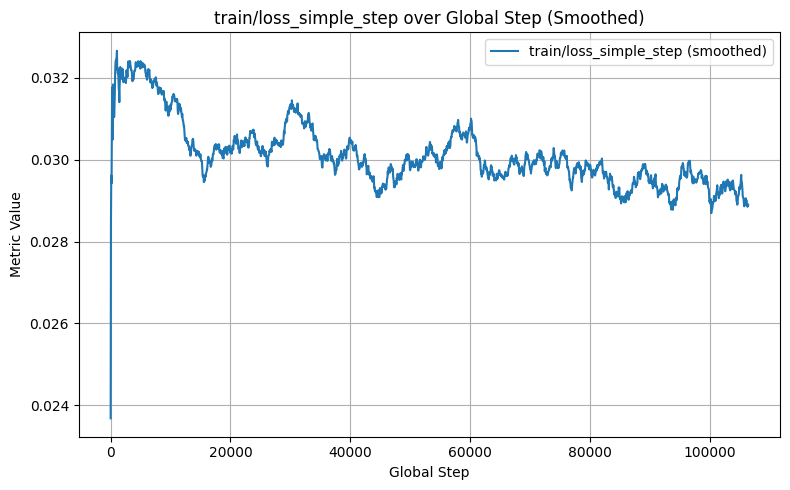

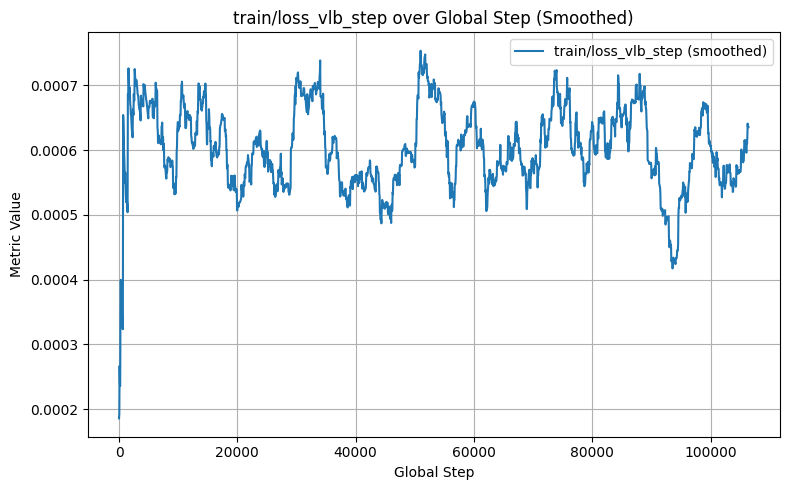

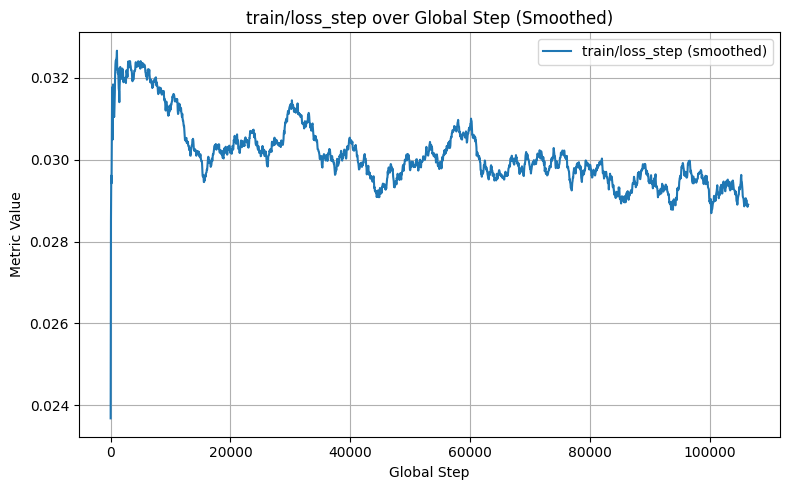

In [18]:
# Rolling window size (you can adjust this)
window_size = 100

for metric in train_step_metrics:
    if metric in df.columns:
        # Apply smoothing
        smoothed = df[metric].rolling(window=window_size, min_periods=1).mean()
        
        plt.figure(figsize=(8, 5))
        plt.plot(range(0, len(smoothed)*50, 50), smoothed, label=f"{metric} (smoothed)", color='tab:blue')
        plt.xlabel("Global Step")
        plt.ylabel("Metric Value")
        plt.title(f"{metric} over Global Step (Smoothed)")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

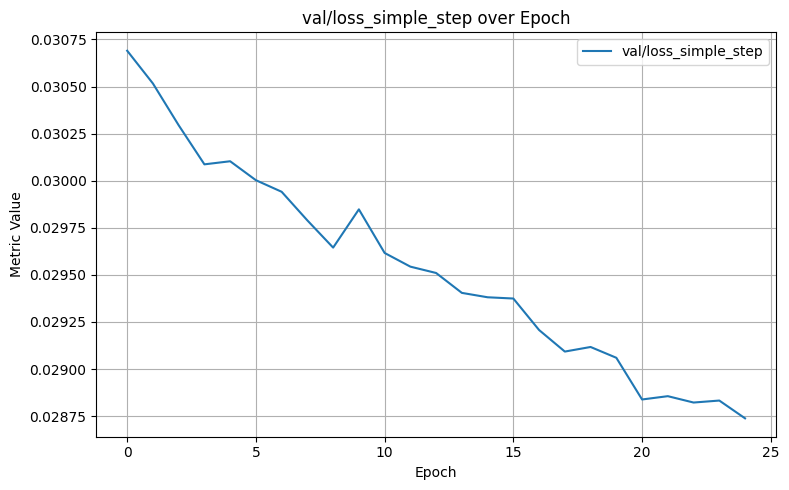

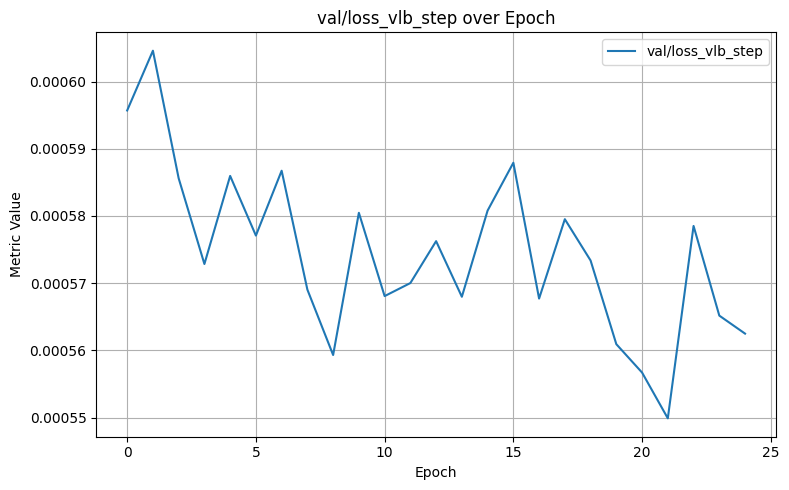

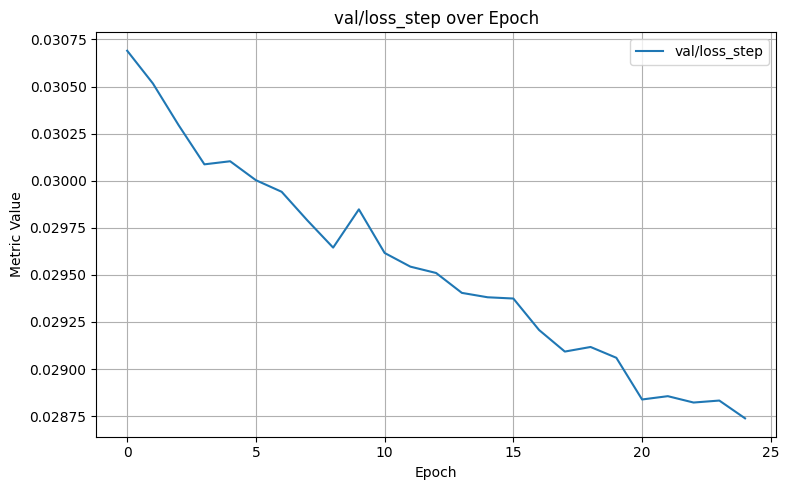

In [19]:
# Drop rows with no global_step (i.e., metadata rows)
df = df_raw[df_raw["val/loss_simple_step"].notnull()].copy()

# Plot each train step metric
val_step_metrics = [
    "val/loss_simple_step",
    "val/loss_vlb_step",
    "val/loss_step"
]

for metric in val_step_metrics:
    if metric in df.columns:
        plt.figure(figsize=(8, 5))
        plt.plot(df['epoch'], df[metric], label=metric)
        plt.xlabel("Epoch")
        plt.ylabel("Metric Value")
        plt.title(f"{metric} over Epoch")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()